In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2


In [2]:
import os

train_dir='../input/chest-xray-pneumonia/chest_xray/train'
print(len(os.listdir(train_dir)))

2


In [4]:
test_dir='../input/chest-xray-pneumonia/chest_xray/test'
print(len(os.listdir(test_dir)))

2


# **VISUALIZATION**

NORMAL CHEST


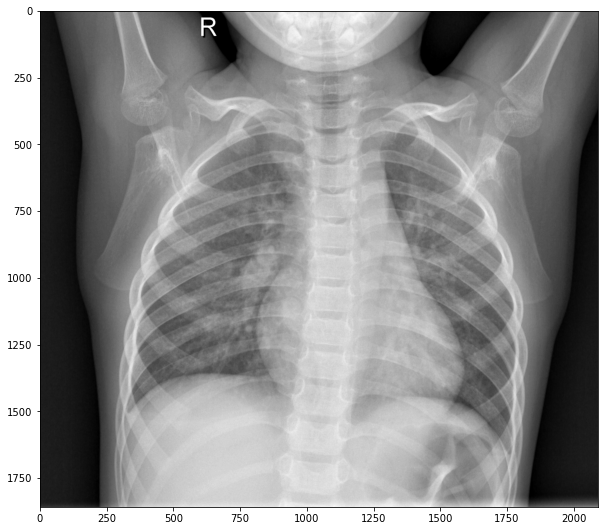

In [5]:
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
img = mpimg.imread('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(img,cmap='gray')
print('NORMAL CHEST')

PNEUMONIA CHEST


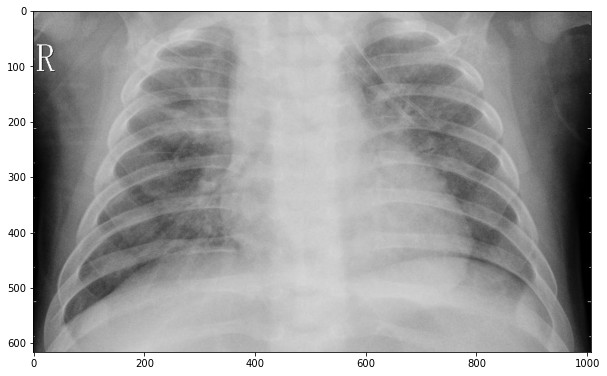

In [6]:
plt.figure(figsize=(10,10))
img = mpimg.imread('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg')
plt.imshow(img,cmap='gray')
print('PNEUMONIA CHEST')

# **Data Augmentation**

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1.0/255.0)

trainDatagen=datagen.flow_from_directory(train_dir,
                                 target_size=(250,250),
                                 batch_size=50,
                                 class_mode='binary',
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True)
valDatagen=datagen.flow_from_directory(test_dir,
                                      target_size=(250,250),
                                      batch_size=10,
                                      class_mode='binary')

TypeError: flow_from_directory() got an unexpected keyword argument 'rotation_range'

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(250,250, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.3),
    
                                    tf.keras.layers.Flatten(),
    
                                    tf.keras.layers.Dense(512, activation='relu'),
    
                                    tf.keras.layers.Dense(1, activation='sigmoid')])



In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 64)       

In [16]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [17]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('accuracy')>0.99):
            self.model.stop_training=True
callbacks=mycallbacks()
history=model.fit_generator(trainDatagen,validation_data=valDatagen,epochs=30,verbose=1,callbacks=[callbacks])

Epoch 1/30
105/105 [==============================] - 69s 661ms/step - loss: 0.3112 - accuracy: 0.8677 - val_loss: 0.7266 - val_accuracy: 0.7308
Epoch 2/30
105/105 [==============================] - 68s 651ms/step - loss: 0.1252 - accuracy: 0.9528 - val_loss: 0.9574 - val_accuracy: 0.7147
Epoch 3/30
105/105 [==============================] - 68s 652ms/step - loss: 0.1087 - accuracy: 0.9599 - val_loss: 0.7410 - val_accuracy: 0.7628
Epoch 4/30
105/105 [==============================] - 68s 648ms/step - loss: 0.0828 - accuracy: 0.9703 - val_loss: 0.9382 - val_accuracy: 0.7484
Epoch 5/30
105/105 [==============================] - 72s 690ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.6378 - val_accuracy: 0.7917
Epoch 6/30
105/105 [==============================] - 68s 647ms/step - loss: 0.0694 - accuracy: 0.9749 - val_loss: 0.7586 - val_accuracy: 0.7901
Epoch 7/30
105/105 [==============================] - 68s 648ms/step - loss: 0.0581 - accuracy: 0.9814 - val_loss: 0.7774 - val_ac

**VISULAIZATION OF OVERFITTING OR UNDERFITTING**

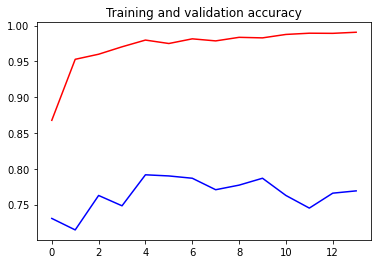

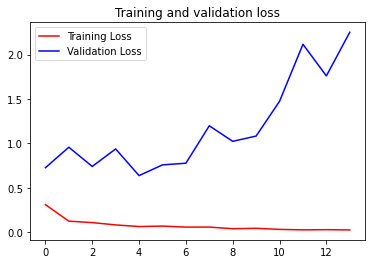

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()